In [5]:
#pip install tensorflow_probability
%matplotlib inline
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from d2l import tensorflow as d2l

In [8]:
# Basic Probability Theory
fair_probs = tf.ones(6) / 6
tfp.distributions.Multinomial(1, fair_probs).sample()

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1.], dtype=float32)>

In [10]:
# 10 samples from multinomial distribution with equal probability
tfp.distributions.Multinomial(10, fair_probs).sample()

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([6., 1., 0., 0., 1., 2.], dtype=float32)>

In [12]:
counts = tfp.distributions.Multinomial(1000, fair_probs).sample()
counts / 1000

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0.162, 0.15 , 0.186, 0.169, 0.168, 0.165], dtype=float32)>

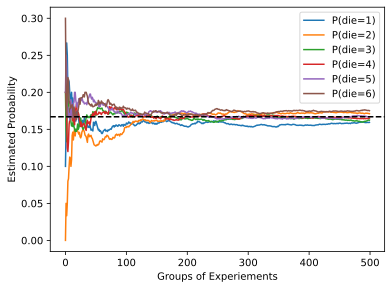

In [20]:
counts = tfp.distributions.Multinomial(10, fair_probs).sample(500)
cum_counts = tf.cumsum(counts, axis = 0)
estimates = cum_counts / tf.reduce_sum(cum_counts, axis = 1, keepdims = True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
    label=("P(die=" + str(i+1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of Experiements')
d2l.plt.gca().set_ylabel('Estimated Probability')
d2l.plt.legend();